In [1]:
%pip install medmnist


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 6.2 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from medmnist import BloodMNIST

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU доступна: {tf.config.list_physical_devices('GPU')}")


TensorFlow version: 2.19.0
GPU доступна: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
train_dataset = BloodMNIST(split='train', download=True, as_rgb=True)
test_dataset = BloodMNIST(split='test', download=True, as_rgb=True)

train_images = train_dataset.imgs
train_labels = train_dataset.labels.flatten()
test_images = test_dataset.imgs
test_labels = test_dataset.labels.flatten()

print(f"Количество классов: {len(np.unique(train_labels))}")
print(f"Классы: {np.unique(train_labels)}")


100%|██████████| 35.5M/35.5M [00:43<00:00, 815kB/s]


Количество классов: 8
Классы: [0 1 2 3 4 5 6 7]


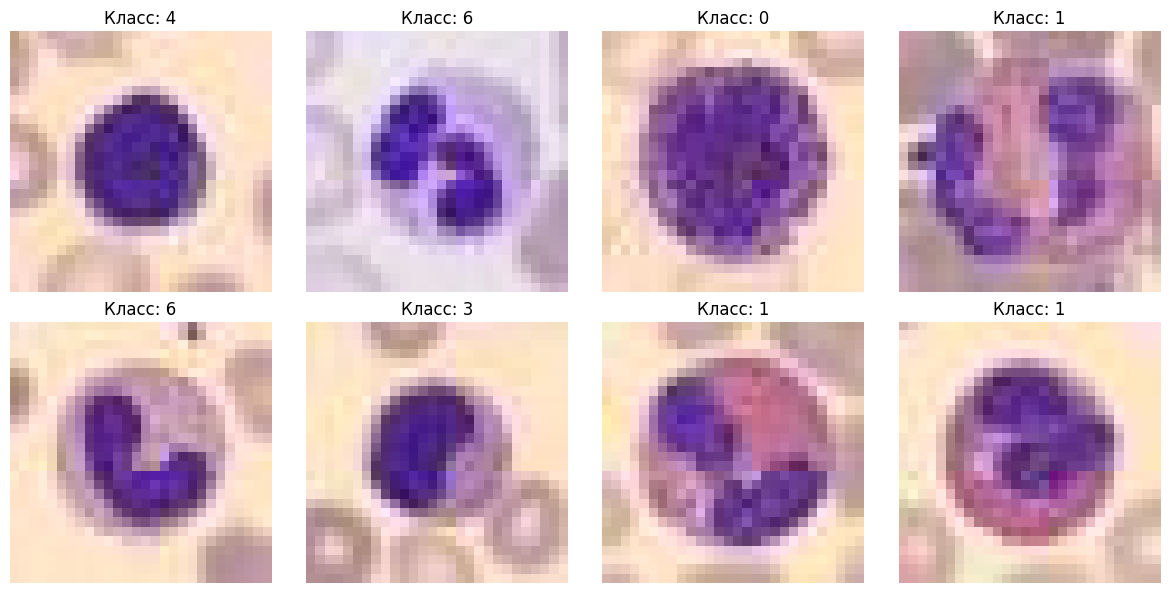

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i in range(8):
    idx = np.random.randint(0, len(train_images))
    axes[i].imshow(train_images[idx])
    axes[i].set_title(f'Класс: {train_labels[idx]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [5]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

num_classes = 8
train_labels_onehot = keras.utils.to_categorical(train_labels, num_classes)
test_labels_onehot = keras.utils.to_categorical(test_labels, num_classes)

# Сверточная модель CNN

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,264 (1.62 MB)

 Trainable params: 423,304 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.00001,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        'best_blood_mnist_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]


In [ ]:
history = model.fit(
    train_images,
    train_labels_onehot,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4579 - loss: 1.8964
Epoch 1: val_accuracy improved from -inf to 0.22032, saving model to best_blood_mnist_model.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.4588 - loss: 1.8922 - val_accuracy: 0.2203 - val_loss: 3.8239 - learning_rate: 0.0010
Epoch 2/50
142/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7330 - loss: 0.7476
Epoch 2: val_accuracy improved from 0.22032 to 0.22115, saving model to best_blood_mnist_model.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7341 - loss: 0.7446 - val_accuracy: 0.2212 - val_loss: 6.0015 - learning_rate: 0.0010
Epoch 3/50
141/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7855 - loss: 0.6162
Epoch 3: val_accuracy improved from 0.22115 to 0.25376, saving model to best_blood_mnist_model.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7860 - loss: 0.6144 - val_accuracy: 0.2538 - val_loss: 4.5094 - learning_rate: 0.0010
Epoch 4/50
140/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8056 - loss: 0.5257
Epoch 4: val_accuracy improved from 0.25376 to 0.57985, saving model to best_blood_mnist_model.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8058 - loss: 0.5255 - val_accuracy: 0.5798 - val_loss: 1.6905 - learning_rate: 0.0010
Epoch 5/50
140/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8316 - loss: 0.4855
Epoch 5: val_accuracy improved from 0.57985 to 0.82107, saving model to best_blood_mnist_model.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8316 - loss: 0.4844 - val_accuracy: 0.8211 - val_loss: 0.5070 - learning_rate: 0.0010
Epoch 6/50
141/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8278 - loss: 0.4605
Epoch 6: val_accuracy did not improve from 0.82107
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8285 - loss: 0.4595 - val_accuracy: 0.7304 - val_loss: 0.8074 - learning_rate: 0.0010
Epoch 7/50
138/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8437 - loss: 0.4252
Epoch 7: val_accuracy did not improve from 0.82107
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8440 - loss: 0.4246 - val_accuracy: 0.7776 - val_loss: 0.6347 - learning_rate: 0.0010
Epoch 8/50
149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8571 - loss: 0.3837
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 8: val_accuracy did not improve from 0.82107
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8571 - loss: 0.3836 - val_accuracy

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8732 - loss: 0.3634 - val_accuracy: 0.8273 - val_loss: 0.4686 - learning_rate: 5.0000e-04
Epoch 10/50
140/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8773 - loss: 0.3343
Epoch 10: val_accuracy improved from 0.82734 to 0.88963, saving model to best_blood_mnist_model.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8773 - loss: 0.3344 - val_accuracy: 0.8896 - val_loss: 0.3266 - learning_rate: 5.0000e-04
Epoch 11/50
148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8831 - loss: 0.3270
Epoch 11: val_accuracy improved from 0.88963 to 0.90134, saving model to best_blood_mnist_model.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8831 - loss: 0.3270 - val_accuracy: 0.9013 - val_loss: 0.2796 - learning_rate: 5.0000e-04
Epoch 12/50
144/150 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8959 - loss: 0.2998
Epoch 12: val_accuracy did not improve from 0.90134
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8956 - loss: 0.3000 - val_accuracy: 0.8528 - val_loss: 0.4188 - learning_rate: 5.0000e-04
Epoch 13/50
147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8874 - loss: 0.3030
Epoch 13: val_accuracy did not improve from 0.90134
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8874 - loss: 0.3031 - val_accuracy: 0.8875 - val_loss: 0.3062 - learning_rate: 5.0000e-04
Epoch 14/50
142/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8837 - loss: 0.3135
Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 14: val_accuracy did not improve from 0.90134
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8843 - loss: 0.

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9084 - loss: 0.2616 - val_accuracy: 0.9089 - val_loss: 0.2374 - learning_rate: 2.5000e-04
Epoch 17/50
143/150 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9004 - loss: 0.2773
Epoch 17: val_accuracy improved from 0.90886 to 0.91054, saving model to best_blood_mnist_model.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9006 - loss: 0.2767 - val_accuracy: 0.9105 - val_loss: 0.2565 - learning_rate: 2.5000e-04
Epoch 18/50
147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9035 - loss: 0.2646
Epoch 18: val_accuracy did not improve from 0.91054
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9036 - loss: 0.2643 - val_accuracy: 0.8462 - val_loss: 0.4833 - learning_rate: 2.5000e-04
Epoch 19/50
145/150 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9050 - loss: 0.2518
Epoch 19: val_accuracy improved from 0.91054 to 0.92600, saving model to best_blood_mnist_model.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9051 - loss: 0.2518 - val_accuracy: 0.9260 - val_loss: 0.2073 - learning_rate: 2.5000e-04
Epoch 20/50
 96/150 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9110 - loss: 0.2440

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['accuracy'], label='Точность на обучении')
axes[0].plot(history.history['val_accuracy'], label='Точность на валидации')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].set_title('Точность модели')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history.history['loss'], label='Потери на обучении')
axes[1].plot(history.history['val_loss'], label='Потери на валидации')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Потери')
axes[1].set_title('Функция потерь')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels_onehot, verbose=1)
print(f'\nТочность на тестовом наборе: {test_accuracy:.4f}')
print(f'Потери на тестовом наборе: {test_loss:.4f}')


In [ ]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes),
            yticklabels=range(num_classes))
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

print('\nОтчет о классификации:')
print(classification_report(test_labels, predicted_classes,
                          target_names=[f'Класс {i}' for i in range(num_classes)]))


In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.ravel()

for i in range(15):
    idx = np.random.randint(0, len(test_images))
    axes[i].imshow(test_images[idx])
    true_label = test_labels[idx]
    pred_label = predicted_classes[idx]
    confidence = predictions[idx][pred_label]

    color = 'green' if true_label == pred_label else 'red'
    axes[i].set_title(f'Истина: {true_label}\nПредсказание: {pred_label}\nУверенность: {confidence:.2f}',
                     color=color, fontsize=9)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Классификация с помощью K-ближайших соседей (KNN) и признаков HOG

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage.feature import hog
from skimage import color
import seaborn as sns
import time

In [ ]:
train_dataset_hog = BloodMNIST(split='train', download=False, as_rgb=True)
test_dataset_hog = BloodMNIST(split='test', download=False, as_rgb=True)

train_images_hog = train_dataset_hog.imgs
train_labels_hog = train_dataset_hog.labels.flatten()
test_images_hog = test_dataset_hog.imgs
test_labels_hog = test_dataset_hog.labels.flatten()


In [ ]:
def extract_hog_features(images):
    features = []

    for img in images:
        if img.shape[2] == 3:
            gray = color.rgb2gray(img)
        else:
            gray = img
        hog_features = hog(
            gray,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=False,
            feature_vector=True
        )
        features.append(hog_features)

    return np.array(features)

In [ ]:
train_hog_features = extract_hog_features(train_images_hog)
test_hog_features = extract_hog_features(test_images_hog)


In [ ]:
k_values = [1, 3, 5, 7, 9, 11]
k_scores = []

sample_size = 2000
sample_indices = np.random.choice(len(train_hog_features), sample_size, replace=False)
train_sample = train_hog_features[sample_indices]
train_labels_sample = train_labels_hog[sample_indices]

val_size = 500
val_indices = np.random.choice(len(test_hog_features), val_size, replace=False)
val_sample = test_hog_features[val_indices]
val_labels_sample = test_labels_hog[val_indices]

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn_temp.fit(train_sample, train_labels_sample)
    score = knn_temp.score(val_sample, val_labels_sample)
    k_scores.append(score)
    print(f"K={k}: Точность = {score:.4f}")

best_k_idx = np.argmax(k_scores)
best_k = k_values[best_k_idx]
print(f"\nОптимальное значение K: {best_k} (точность: {k_scores[best_k_idx]:.4f})")


In [ ]:
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_model.fit(train_hog_features, train_labels_hog)
training_time = time.time() - start_time


In [ ]:
knn_predictions = knn_model.predict(test_hog_features)

knn_accuracy = accuracy_score(test_labels_hog, knn_predictions)
print(f"\nТочность модели KNN: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")


In [ ]:
cm_knn = confusion_matrix(test_labels_hog, knn_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes),
            yticklabels=range(num_classes))
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.title('Матрица ошибок для модели KNN', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
print('\nОтчет о классификации для модели KNN:')
print(classification_report(test_labels_hog, knn_predictions,
                          target_names=[f'Класс {i}' for i in range(num_classes)]))


In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.ravel()

correct = 0
incorrect = 0
indices_to_show = []

for i in range(len(test_labels_hog)):
    if test_labels_hog[i] == knn_predictions[i] and correct < 10:
        indices_to_show.append((i, True))
        correct += 1
    elif test_labels_hog[i] != knn_predictions[i] and incorrect < 5:
        indices_to_show.append((i, False))
        incorrect += 1
    if len(indices_to_show) >= 15:
        break

while len(indices_to_show) < 15:
    idx = np.random.randint(0, len(test_labels_hog))
    if (idx, True) not in indices_to_show and (idx, False) not in indices_to_show:
        indices_to_show.append((idx, test_labels_hog[idx] == knn_predictions[idx]))

for i, (idx, is_correct) in enumerate(indices_to_show[:15]):
    axes[i].imshow(test_images_hog[idx])
    true_label = test_labels_hog[idx]
    pred_label = knn_predictions[idx]

    color = 'green' if is_correct else 'red'
    axes[i].set_title(f'Истина: {true_label}\nПредсказание: {pred_label}',
                     color=color, fontsize=9)
    axes[i].axis('off')

plt.suptitle('Примеры предсказаний модели KNN (зеленый = правильно, красный = неправильно)',
             fontsize=12, y=0.995)
plt.tight_layout()
plt.show()


# Классификация с помощью Support Vector Machine (SVM) и признаков HOG


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
scaler = StandardScaler()

train_hog_scaled = scaler.fit_transform(train_hog_features)
test_hog_scaled = scaler.transform(test_hog_features)

In [ ]:
sample_size = 3000
sample_indices = np.random.choice(len(train_hog_scaled), sample_size, replace=False)
train_sample = train_hog_scaled[sample_indices]
train_labels_sample = train_labels_hog[sample_indices]

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['rbf', 'linear']
}

svm_base = SVC()


grid_search = GridSearchCV(
    svm_base,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(train_sample, train_labels_sample)

In [ ]:
best_params = grid_search.best_params_
svm_model = SVC(
    C=best_params['C'],
    gamma=best_params['gamma'],
    kernel=best_params['kernel'],
    probability=True
)
svm_model.fit(train_hog_scaled, train_labels_hog)

In [ ]:
svm_predictions = svm_model.predict(test_hog_scaled)

svm_accuracy = accuracy_score(test_labels_hog, svm_predictions)
print(f"\nТочность модели SVM: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")


In [ ]:
cm_svm = confusion_matrix(test_labels_hog, svm_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes),
            yticklabels=range(num_classes))
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.title('Матрица ошибок для модели SVM', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
print('\nОтчет о классификации для модели SVM:')
print(classification_report(test_labels_hog, svm_predictions,
                          target_names=[f'Класс {i}' for i in range(num_classes)]))


In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.ravel()

correct = 0
incorrect = 0
indices_to_show = []

for i in range(len(test_labels_hog)):
    if test_labels_hog[i] == svm_predictions[i] and correct < 10:
        indices_to_show.append((i, True))
        correct += 1
    elif test_labels_hog[i] != svm_predictions[i] and incorrect < 5:
        indices_to_show.append((i, False))
        incorrect += 1
    if len(indices_to_show) >= 15:
        break

while len(indices_to_show) < 15:
    idx = np.random.randint(0, len(test_labels_hog))
    if (idx, True) not in indices_to_show and (idx, False) not in indices_to_show:
        indices_to_show.append((idx, test_labels_hog[idx] == svm_predictions[idx]))

for i, (idx, is_correct) in enumerate(indices_to_show[:15]):
    axes[i].imshow(test_images_hog[idx])
    true_label = test_labels_hog[idx]
    pred_label = svm_predictions[idx]

    if hasattr(svm_model, 'predict_proba'):
        proba = svm_model.predict_proba(test_hog_scaled[idx:idx+1])[0][pred_label]
        confidence = proba
    else:
        confidence = 1.0

    color = 'green' if is_correct else 'red'
    axes[i].set_title(f'Истина: {true_label}\nПредсказание: {pred_label}\nУверенность: {confidence:.2f}',
                     color=color, fontsize=9)
    axes[i].axis('off')

plt.suptitle('Примеры предсказаний модели SVM (зеленый = правильно, красный = неправильно)',
             fontsize=12, y=0.995)
plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "="*60)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ ВСЕХ МОДЕЛЕЙ")
print("="*60)

models_comparison = {}

if 'test_accuracy' in locals():
    models_comparison['CNN'] = test_accuracy
    print(f"\nТочность модели CNN: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

if 'knn_accuracy' in locals():
    models_comparison['KNN'] = knn_accuracy
    print(f"Точность модели KNN: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")

if 'svm_accuracy' in locals():
    models_comparison['SVM'] = svm_accuracy
    print(f"Точность модели SVM: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")

if models_comparison:
    best_model = max(models_comparison, key=models_comparison.get)
    best_accuracy = models_comparison[best_model]
    print(f"\nЛучшая модель: {best_model} с точностью {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

    for model_name, accuracy in models_comparison.items():
        if model_name != best_model:
            diff = best_accuracy - accuracy
            print(f"  {best_model} лучше {model_name} на {diff:.4f} ({diff*100:.2f}%)")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import joblib
import os

models_dir = 'drive/MyDrive/saved_models'
os.makedirs(models_dir, exist_ok=True)

cnn_model_path = os.path.join(models_dir, 'cnn_blood_mnist_model.keras')
model.save(cnn_model_path)

knn_model_path = os.path.join(models_dir, 'knn_blood_mnist_model.joblib')
joblib.dump(knn_model, knn_model_path)

svm_model_path = os.path.join(models_dir, 'svm_blood_mnist_model.joblib')
joblib.dump(svm_model, svm_model_path)

scaler_path = os.path.join(models_dir, 'svm_scaler.joblib')
joblib.dump(scaler, scaler_path)

models_info = {
    'CNN': {
        'accuracy': float(test_accuracy),
        'model_path': cnn_model_path,
        'type': 'TensorFlow/Keras'
    },
    'KNN': {
        'accuracy': float(knn_accuracy),
        'model_path': knn_model_path,
        'type': 'scikit-learn',
        'best_k': int(best_k)
    },
    'SVM': {
        'accuracy': float(svm_accuracy),
        'model_path': svm_model_path,
        'scaler_path': scaler_path,
        'type': 'scikit-learn',
        'best_params': best_params
    }
}

import json
info_path = os.path.join(models_dir, 'models_info.json')
with open(info_path, 'w', encoding='utf-8') as f:
    json.dump(models_info, f, indent=4, ensure_ascii=False)


# Telegram BOT
@blood_classificator_bot
https://drive.google.com/drive/folders/1VdZvjj2ZD3_UCp3LznL1EKlhRtjOPwmX?usp=sharing

In [ ]:
%pip install aiogram pillow nest_asyncio


In [ ]:
import asyncio
import io
from aiogram import Bot, Dispatcher, types, F
from aiogram.filters import Command
from aiogram.types import Message
from aiogram.utils.keyboard import ReplyKeyboardBuilder
from PIL import Image
import numpy as np
import joblib
import json
import os
from tensorflow import keras
from skimage.feature import hog
from skimage import color


In [ ]:
models_dir = 'drive/MyDrive/saved_models'

bot_cnn_model = None
bot_knn_model = None
bot_svm_model = None
bot_scaler = None
models_info_dict = {}

def load_models_for_bot():
    global bot_cnn_model, bot_knn_model, bot_svm_model, bot_scaler, models_info_dict

    info_path = os.path.join(models_dir, 'models_info.json')
    if os.path.exists(info_path):
        with open(info_path, 'r', encoding='utf-8') as f:
            models_info_dict = json.load(f)

    cnn_model_path = os.path.join(models_dir, 'cnn_blood_mnist_model.keras')
    if os.path.exists(cnn_model_path):
        bot_cnn_model = keras.models.load_model(cnn_model_path)
    else:
        print(f"CNN модель не найдена: {cnn_model_path}")

    knn_model_path = os.path.join(models_dir, 'knn_blood_mnist_model.joblib')
    if os.path.exists(knn_model_path):
        bot_knn_model = joblib.load(knn_model_path)
    else:
        print(f"KNN модель не найдена: {knn_model_path}")

    svm_model_path = os.path.join(models_dir, 'svm_blood_mnist_model.joblib')
    if os.path.exists(svm_model_path):
        bot_svm_model = joblib.load(svm_model_path)
    else:
        print(f"SVM модель не найдена: {svm_model_path}")

    scaler_path = os.path.join(models_dir, 'svm_scaler.joblib')
    if os.path.exists(scaler_path):
        bot_scaler = joblib.load(scaler_path)
    else:
        print(f"⚠ StandardScaler не найден: {scaler_path}")

    all_ready = all([bot_cnn_model, bot_knn_model, bot_svm_model, bot_scaler])

    return all_ready

load_models_for_bot()


In [ ]:

def preprocess_image_for_cnn(image_array):
    if image_array.max() > 1.0:
        image_array = image_array.astype('float32') / 255.0
    else:
        image_array = image_array.astype('float32')

    if len(image_array.shape) == 3:
        image_array = np.expand_dims(image_array, axis=0)

    return image_array


def extract_hog_features_for_bot(image_array):
    if len(image_array.shape) == 3 and image_array.shape[2] == 3:
        gray = color.rgb2gray(image_array)
    else:
        gray = image_array

    hog_features = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=False,
        feature_vector=True
    )

    return np.array([hog_features])


def predict_cnn(image_array):
    if bot_cnn_model is None:
        return None, None

    processed_image = preprocess_image_for_cnn(image_array)
    probabilities = bot_cnn_model.predict(processed_image, verbose=0)
    predicted_class = np.argmax(probabilities, axis=1)[0]
    confidence = probabilities[0][predicted_class]

    return int(predicted_class), float(confidence)


def predict_knn(image_array):
    if bot_knn_model is None:
        return None

    features = extract_hog_features_for_bot(image_array)
    predicted_class = bot_knn_model.predict(features)[0]

    return int(predicted_class)


def predict_svm(image_array):
    if bot_svm_model is None or bot_scaler is None:
        return None, None

    features = extract_hog_features_for_bot(image_array)
    features_scaled = bot_scaler.transform(features)
    predicted_class = bot_svm_model.predict(features_scaled)[0]

    confidence = None
    if hasattr(bot_svm_model, 'predict_proba'):
        probabilities = bot_svm_model.predict_proba(features_scaled)
        confidence = float(probabilities[0][predicted_class])

    return int(predicted_class), confidence


def process_image_from_bytes(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))

    if image.mode != 'RGB':
        image = image.convert('RGB')

    image = image.resize((28, 28), Image.Resampling.LANCZOS)

    image_array = np.array(image, dtype=np.uint8)

    return image_array


In [ ]:
BOT_TOKEN = '8295945063:AAGd00KiGge2aDdTGEbL5M3DgAhunEG-c08'

bot = Bot(token=BOT_TOKEN)
dp = Dispatcher()

blood_classes = [
    "Basophil (Базофил)",
    "Eosinophil (Эозинофил)",
    "Erythroblast (Эритробласт)",
    "Immature Granulocytes (Незрелые гранулоциты)",
    "Lymphocyte (Лимфоцит)",
    "Monocyte (Моноцит)",
    "Neutrophil (Нейтрофил)",
    "Platelet (Тромбоцит)"
]

@dp.message(Command("start"))
async def cmd_start(message: Message):
    welcome_text = (
        "🔬 <b>Добро пожаловать в бот классификации клеток крови!</b>\n\n"
        "Я могу классифицировать изображения клеток крови с помощью трех моделей:\n"
        "• CNN (сверточная нейронная сеть)\n"
        "• KNN (K-ближайших соседей)\n"
        "• SVM (машина опорных векторов)\n\n"
        "📸 <b>Отправьте мне изображение клетки крови</b>, и я покажу результаты всех трех моделей!"
    )
    await message.answer(welcome_text, parse_mode="HTML")


@dp.message(F.photo)
async def handle_photo(message: Message):
    await message.answer("🔄 Обрабатываю изображение...")

    try:
        photo = message.photo[-1]
        file = await bot.get_file(photo.file_id)

        image_bytes = await bot.download_file(file.file_path)
        image_data = image_bytes.read()

        image_array = process_image_from_bytes(image_data)

        results = {}

        if bot_cnn_model:
            cnn_class, cnn_confidence = predict_cnn(image_array)
            results['CNN'] = {
                'class': cnn_class,
                'confidence': cnn_confidence,
                'class_name': blood_classes[cnn_class] if cnn_class is not None else None
            }

        if bot_knn_model:
            knn_class = predict_knn(image_array)
            results['KNN'] = {
                'class': knn_class,
                'class_name': blood_classes[knn_class] if knn_class is not None else None
            }

        if bot_svm_model and bot_scaler:
            svm_class, svm_confidence = predict_svm(image_array)
            results['SVM'] = {
                'class': svm_class,
                'confidence': svm_confidence,
                'class_name': blood_classes[svm_class] if svm_class is not None else None
            }

        response_text = "🔬 <b>Результаты классификации:</b>\n\n"

        for model_name, result in results.items():
            if result['class'] is not None:
                response_text += f"<b>{model_name}:</b>\n"
                response_text += f"  Класс: {result['class']} - {result['class_name']}\n"
                if result.get('confidence') is not None:
                    response_text += f"  Уверенность: {result['confidence']:.2%}\n"
                response_text += "\n"

        if models_info_dict:
            response_text += "\n📊 <b>Точность моделей:</b>\n"
            for model_name in ['CNN', 'KNN', 'SVM']:
                if model_name in models_info_dict:
                    acc = models_info_dict[model_name]['accuracy']
                    response_text += f"  {model_name}: {acc:.2%}\n"

        await message.answer(response_text, parse_mode="HTML")

    except Exception as e:
        error_text = f"❌ Произошла ошибка при обработке изображения:\n{str(e)}"
        await message.answer(error_text)
        print(f"Ошибка: {e}")


@dp.message(F.document)
async def handle_document(message: Message):
    if message.document.mime_type and message.document.mime_type.startswith('image/'):
        await message.answer("🔄 Обрабатываю изображение...")

        try:
            file = await bot.get_file(message.document.file_id)
            image_bytes = await bot.download_file(file.file_path)
            image_data = image_bytes.read()

            image_array = process_image_from_bytes(image_data)

            results = {}

            if bot_cnn_model:
                cnn_class, cnn_confidence = predict_cnn(image_array)
                results['CNN'] = {
                    'class': cnn_class,
                    'confidence': cnn_confidence,
                    'class_name': blood_classes[cnn_class] if cnn_class is not None else None
                }

            if bot_knn_model:
                knn_class = predict_knn(image_array)
                results['KNN'] = {
                    'class': knn_class,
                    'class_name': blood_classes[knn_class] if knn_class is not None else None
                }

            if bot_svm_model and bot_scaler:
                svm_class, svm_confidence = predict_svm(image_array)
                results['SVM'] = {
                    'class': svm_class,
                    'confidence': svm_confidence,
                    'class_name': blood_classes[svm_class] if svm_class is not None else None
                }

            response_text = "🔬 <b>Результаты классификации:</b>\n\n"

            for model_name, result in results.items():
                if result['class'] is not None:
                    response_text += f"<b>{model_name}:</b>\n"
                    response_text += f"  Класс: {result['class']} - {result['class_name']}\n"
                    if result.get('confidence') is not None:
                        response_text += f"  Уверенность: {result['confidence']:.2%}\n"
                    response_text += "\n"

            if models_info_dict:
                response_text += "\n📊 <b>Точность моделей:</b>\n"
                for model_name in ['CNN', 'KNN', 'SVM']:
                    if model_name in models_info_dict:
                        acc = models_info_dict[model_name]['accuracy']
                        response_text += f"  {model_name}: {acc:.2%}\n"

            await message.answer(response_text, parse_mode="HTML")

        except Exception as e:
            error_text = f"❌ Произошла ошибка при обработке изображения:\n{str(e)}"
            await message.answer(error_text)
            print(f"Ошибка: {e}")
    else:
        await message.answer("❌ Пожалуйста, отправьте изображение (фото или файл изображения)")


In [ ]:
import nest_asyncio
nest_asyncio.apply()

async def main():
    await dp.start_polling(bot)

try:
    asyncio.run(main())
except:
    pass
finally:
    pass